## Introduction

In today’s data-driven exploration, we delve into an extensive dataset of car attributes with the aim of uncovering patterns, predicting outcomes, and segmenting the market based on various characteristics. Our journey encompasses a series of data science techniques, starting from predictive modeling to interactive visualizations, and culminating in sophisticated clustering analysis for market segmentation. This comprehensive analysis is designed to leverage the rich dataset to provide insights into automotive market dynamics, fuel efficiency factors, and strategic market positioning of different car models.

### Objectives
- **Predictive Modeling**: Develop models to forecast car prices and fuel efficiency (city and highway mileage) using features such as engine size, horsepower, and more. This involves employing linear regression and random forest algorithms to predict continuous outcomes and classification models for categorical outcomes.
- **Interactive Visualizations**: Implement interactive visualizations that allow users to dynamically explore the impact of various car features on price and fuel efficiency. This approach aims to provide an intuitive understanding of the relationships within the data, facilitating a hands-on exploration experience.
- **Clustering for Market Segmentation**: Utilize unsupervised learning techniques, specifically K-means clustering, to segment cars into distinct groups based on their attributes. This segmentation aims to identify niche markets and understand consumer preferences within the automotive industry.

### Approach
Our analysis begins with a thorough preprocessing of the dataset, followed by the development of predictive models tailored to our objectives. We then enhance our exploration with interactive visualizations, enabling a user-driven inquiry into the predictive models’ outcomes. Finally, we apply clustering techniques to identify and visualize market segments, offering strategic insights into the automotive market.

This exploration is not just about applying data science techniques; it's about weaving these methods together to tell a coherent story about the automotive market. Through predictive modeling, we forecast key metrics; with interactive visualizations, we explore these predictions dynamically; and through clustering, we uncover hidden market structures. Let’s embark on this analytical journey to unlock the stories hidden within the data.


**Loading in Libraries and Files**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import ipywidgets as widgets # widgets
from IPython.display import display #interactive visuals
from sklearn.model_selection import train_test_split # modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.cluster import KMeans
import os
for dirname, _, filenames in os.walk('/kaggle/input/branded-cars-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/branded-cars-dataset/Automobile data.csv')

/kaggle/input/branded-cars-dataset/Automobile data.csv


**Lets take a look at the first few rows of the Dataframe**

In [2]:
print(df.head(15))

     Brand Name Fuel type Aspiration Door Panel       Design Wheel Drive  \
0   alfa-romero       gas        std        two  convertible         rwd   
1   alfa-romero       gas        std        two  convertible         rwd   
2   alfa-romero       gas        std        two    hatchback         rwd   
3          audi       gas        std       four        sedan         fwd   
4          audi       gas        std       four        sedan         4wd   
5          audi       gas        std        two        sedan         fwd   
6          audi       gas        std       four        sedan         fwd   
7          audi       gas        std       four        wagon         fwd   
8          audi       gas      turbo       four        sedan         fwd   
9          audi       gas      turbo        two    hatchback         4wd   
10          bmw       gas        std        two        sedan         rwd   
11          bmw       gas        std       four        sedan         rwd   
12          

**We can see the head and now lets create a interactive visual for the people that will use this notebook but dont want to read the output**

In [3]:
# Function to plot data
def plot_data(column):
    # Filter data based on the selected column
    data = df[column].value_counts()

    # Create figure and axis objects
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar graph
    data.plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Bar Graph of {column}')
    axes[0].set_ylabel('Counts')

    # Pie chart
    data.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_ylabel('')
    axes[1].set_title(f'Pie Chart of {column}')

    plt.tight_layout()
    plt.show()

# Create a dropdown for column selection
column_dropdown = widgets.Dropdown(
    options=df.columns.tolist(),
    value=df.columns[0],
    description='Column:',
    disabled=False,
)

# Display interactive plot
widgets.interactive(plot_data, column=column_dropdown)

interactive(children=(Dropdown(description='Column:', options=('Brand Name', 'Fuel type', 'Aspiration', 'Door …

**Now lets do something with this data, lets start with a Price Prediction Model**

In [4]:
# Define features and target variable
X = df.drop('Price in Dollars', axis=1)
y = df['Price in Dollars']

# Preprocessing for numerical and categorical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3108138468.62167


In [5]:
# Adjusting the DataFrame by dropping specified columns
X_city = df.drop(['City Mileage', 'Highway Mileage'], axis=1)
y_city = df['City Mileage']

# Dynamically select numerical and categorical columns after dropping
numerical_cols = X_city.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_city.select_dtypes(include=['object', 'bool']).columns

# Update the preprocessor to only include the existing columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ])

# Define the model with the updated preprocessor
model_city = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Proceed with the train-test split and model fitting as before
X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X_city, y_city, test_size=0.2, random_state=42)
model_city.fit(X_train_city, y_train_city)
y_pred_city = model_city.predict(X_test_city)

# Evaluate the model
mse_city = mean_squared_error(y_test_city, y_pred_city)
print(f'City Mileage - Mean Squared Error: {mse_city}')

City Mileage - Mean Squared Error: 7.576241463414634


In [6]:
# Categorize cars based on city mileage (e.g., high efficiency if above median)
median_mileage = df['City Mileage'].median()
df['High Efficiency'] = (df['City Mileage'] > median_mileage).astype(int)

X_class = df.drop(['City Mileage', 'Highway Mileage', 'High Efficiency'], axis=1)
y_class = df['High Efficiency']

# Model pipeline for classification
model_class = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Splitting data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
model_class.fit(X_train_class, y_train_class)
y_pred_class = model_class.predict(X_test_class)

# Evaluate classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Classification Accuracy: {accuracy}')


Classification Accuracy: 0.9512195121951219


In [7]:
# Simplified feature input widgets
engine_size_widget = widgets.FloatSlider(
    min=df['Engine Size'].min(), 
    max=df['Engine Size'].max(), 
    step=1, 
    value=df['Engine Size'].mean(), 
    description='Engine Size:'
)

horse_power_widget = widgets.FloatSlider(
    min=df['Horse Power'].min(), 
    max=df['Horse Power'].max(), 
    step=1, 
    value=df['Horse Power'].mean(),
    description='Horse Power:'
)

# Assuming direct input for city mileage for classification demo
city_mileage_widget = widgets.FloatSlider(
    min=df['City Mileage'].min(), 
    max=df['City Mileage'].max(), 
    step=1, 
    value=df['City Mileage'].mean(),
    description='City Mileage:'
)

def predict(engine_size, horse_power, city_mileage):
    # Simulate model predictions (replace with your actual model predictions)
    predicted_price = engine_size * 150 + horse_power * 100  # Simplified prediction logic for demonstration
    predicted_mileage = 30 - (engine_size / 10) - (horse_power / 100)  # Simplified prediction logic
    
    # Efficiency classification based on simplified logic
    efficiency_class = "High" if city_mileage > 25 else "Low"
    
    # Visualizing the predictions
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(['Price', 'Mileage'], [predicted_price, predicted_mileage], color=['blue', 'green'])
    plt.ylabel('Value')
    plt.title('Predicted Price and Mileage')
    
    plt.subplot(1, 2, 2)
    labels = ['High Efficiency', 'Low Efficiency']
    sizes = [city_mileage, 30 - city_mileage]  # Simplified for visualization
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Efficiency Classification')
    
    plt.tight_layout()
    plt.show()

# Creating interactive widgets
interactive_plot = widgets.interactive(predict, engine_size=engine_size_widget, horse_power=horse_power_widget, city_mileage=city_mileage_widget)
display(interactive_plot)

interactive(children=(FloatSlider(value=126.90731707317073, description='Engine Size:', max=326.0, min=61.0, s…

**Now lets do some clusting for market segmentation**

In [8]:
# Selecting a subset of features for clustering
features = ['Engine Size', 'Horse Power', 'City Mileage', 'Highway Mileage', 'Price in Dollars']
X = df[features].dropna()  # Dropping rows with missing values for simplicity

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

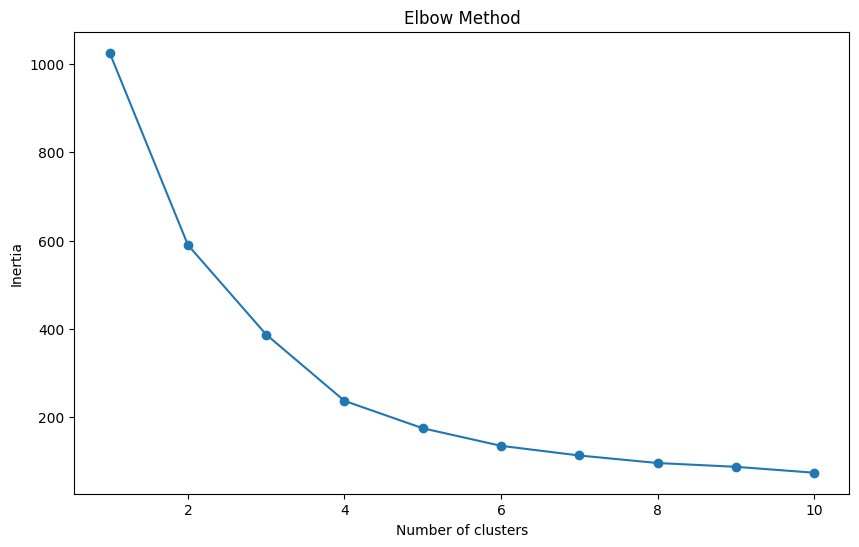

In [9]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Clustering with the selected number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to our DataFrame
X['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

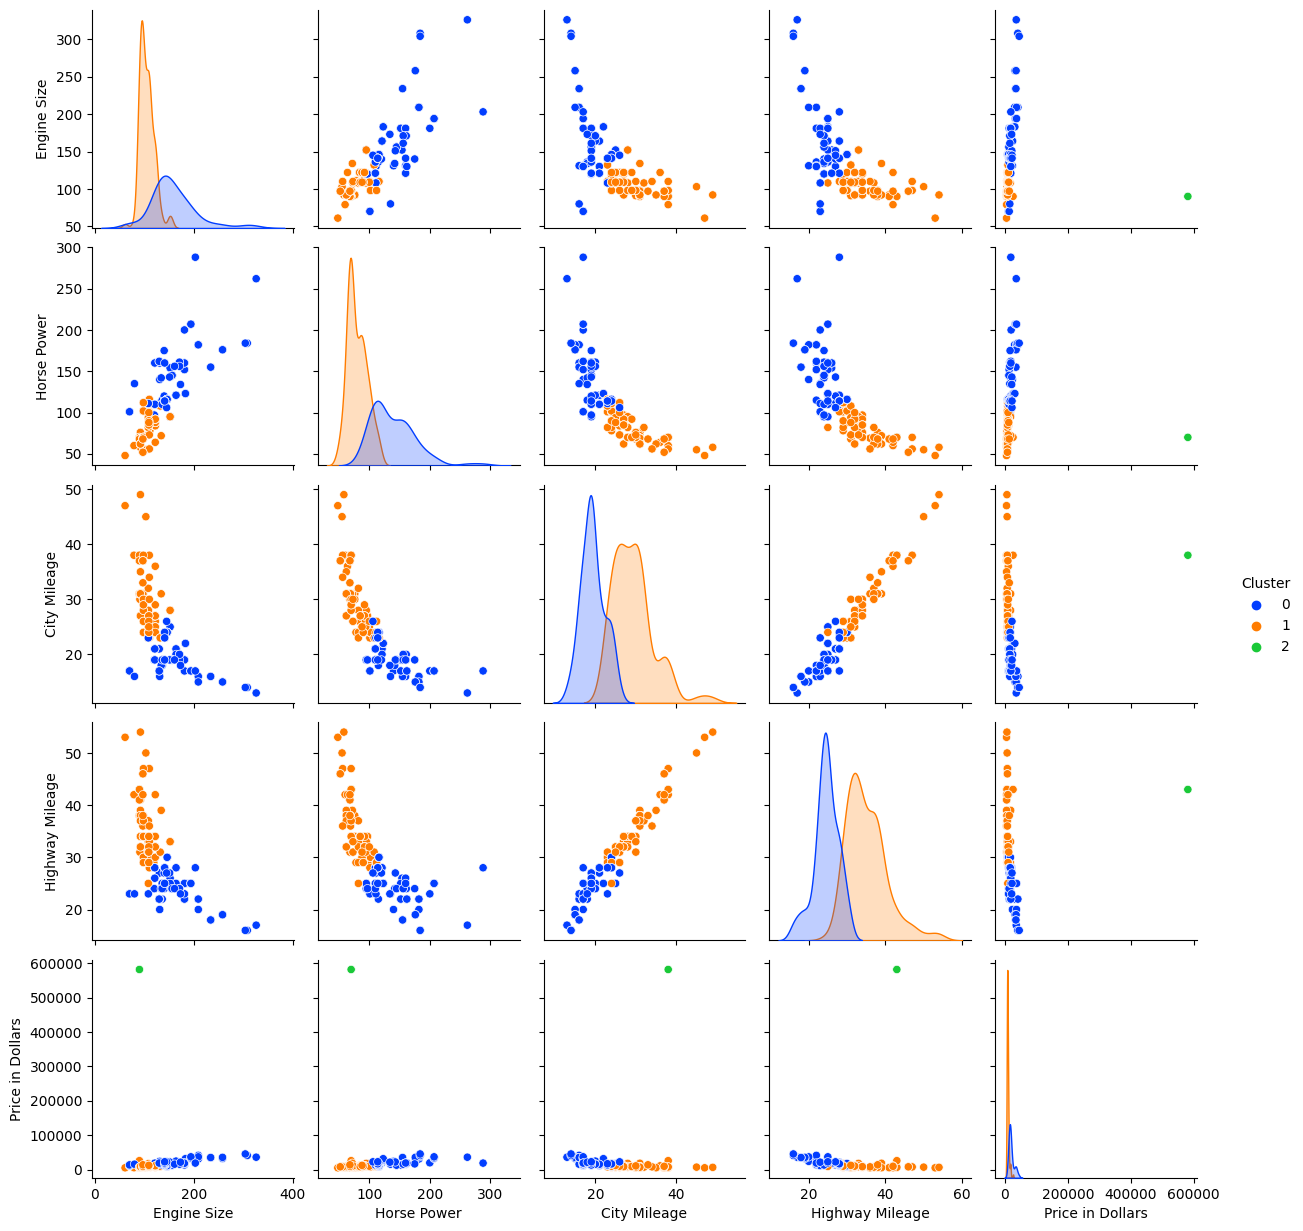

In [11]:
# Visualizing clusters using pair plot for a subset of features
sns.pairplot(X, hue='Cluster', vars=features, palette='bright')
plt.show()

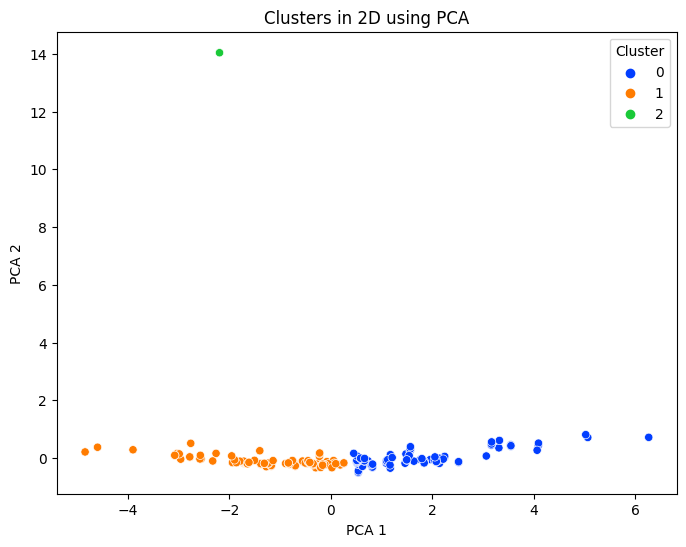

In [12]:
from sklearn.decomposition import PCA

# Reducing the data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='bright')
plt.title('Clusters in 2D using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

The clustering analysis presented in the graphs aims to segment the car market based on selected characteristics: Engine Size, Horse Power, City Mileage, Highway Mileage, and Price. By applying K-means clustering, we have identified distinct groups that share similar attributes, facilitating the understanding of market segmentation and potential customer preferences.

In the Elbow Method graph, we look for the "elbow" point where the rate of decrease in inertia (within-cluster sum of squares) slows down significantly. This point suggests an optimal number of clusters for our data, balancing between the model's complexity and its ability to fit the data. The chosen number of clusters provides a compromise between having too many small clusters and too few broad clusters, aiming for meaningful segmentation that can inform targeted marketing strategies or product development.

The Pair Plot visualizations offer detailed insights into how the cars in each cluster compare across different pairs of features. Each plot shows the distribution of two features at a time, colored by their cluster membership. This multi-dimensional comparison helps in understanding the relationships between features within each cluster, highlighting how certain characteristics (like engine size and horsepower) co-vary within the market segments.

The PCA-based 2D Scatter Plot reduces the dimensionality of our data to two principal components, allowing us to visualize the clusters in a 2D space. Even though PCA components are linear combinations of the original features and might not have a direct interpretation, this visualization helps in observing the separation between clusters. The scatter plot showcases how well the clustering algorithm has managed to find distinct groups within the car market, based on the underlying patterns in the dataset.

Together, these graphs provide a comprehensive overview of the market segmentation derived from the clustering analysis. They offer valuable insights into how different car models group together based on their specifications and pricing, highlighting potential niches in the market and aiding in strategic decision-making for manufacturers and marketers.

## Conclusion

Today, we embarked on a comprehensive journey through the application of data science techniques to a car dataset, focusing on predictive modeling, interactive visualizations, and clustering for market segmentation. Our exploration has yielded valuable insights into car characteristics, their relationships with price, fuel efficiency, and market segments.

### Predictive Modeling
We developed predictive models to estimate car prices and fuel efficiency (city and highway mileage) based on various car features. Our models utilized linear regression for price prediction and random forest regressors for mileage prediction, showcasing how machine learning can be applied to understand and predict automotive market dynamics. Additionally, we implemented a classification model to distinguish cars based on their fuel efficiency, demonstrating the potential for categorizing vehicles in meaningful ways that align with consumer preferences and environmental considerations.

### Interactive Visualizations
To enhance our analysis, we created interactive visualizations that allow for dynamic exploration of the data. These visualizations include sliders for adjusting input features and immediately observing the effects on predicted outcomes such as price, mileage, and efficiency classification. This interactivity provides a user-friendly way to explore complex relationships within the data, making our findings accessible to a broader audience.

### Clustering for Market Segmentation
By applying K-means clustering, we segmented the car market based on characteristics like engine size, horsepower, and mileage. Our analysis identified distinct groups or clusters of cars, offering insights into how vehicles are positioned within the market. Visualizing these clusters through pair plots and PCA-enhanced scatter plots allowed us to observe the natural groupings in the data, highlighting potential niche markets and informing strategic decisions for manufacturers and marketers.

### General Insights
Our comprehensive analysis has demonstrated the power of data science in extracting meaningful insights from complex datasets. Predictive modeling can forecast key outcomes, interactive visualizations facilitate exploratory data analysis, and clustering reveals underlying market structures. These techniques, when applied thoughtfully, can guide decision-making processes, enhance strategic planning, and reveal consumer preferences within the automotive industry.

In conclusion, the journey through data analysis, predictive modeling, and visualization has not only provided specific insights into the car market but also illustrated broader applications of data science methodologies. These approaches can be adapted and extended to various domains, showcasing the versatility and value of data-driven decision-making in today's data-rich world.
